In [1]:
import numpy as np
import zipfile as zp
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

# average price of the last 50 years
output = pd.read_csv('./2023-08-12T22-19-20.986698Z/Output-run1.csv',sep=';',skipinitialspace=True)

_50_years = output[3001:].reset_index()

_50_years.head(3)

,index,Model time,nNonBTLHomeless,nBTLHomeless,nHomeless,nRenting,nNonOwner,nNonBTLOwnerOccupier,nBTLOwnerOccupier,nOwnerOccupier,...,nNewFTBMortgages,nNewFTBMortgagesToBTL,nNewHMMortgages,nNewBTLMortgages,newFTBCredit,newHMCredit,newBTLCredit,newTotalCredit,creditStock,interestRate
0,3001,3001,1526,147,1673,2140,3813,5030,380,5410,...,3,3,1,2,511667.07,81950.04,152642.56,746259.67,2.928710e+08,0.032300
1,3002,3002,1536,144,1680,2141,3821,5019,383,5402,...,5,4,1,2,210613.30,41433.88,53267.29,305314.47,2.917289e+08,0.032832
2,3003,3003,1542,142,1684,2144,3828,5012,384,5396,...,3,3,0,3,278612.39,0.00,154812.19,433424.58,2.906836e+08,0.032246


In [4]:
average_sale_price = _50_years['Sale AvSalePrice'].mean()
average_sale_price

172934.81925

In [6]:
# Sale nSales
average_sale_nums = _50_years['Sale nSales'].mean()
average_sale_nums

38.086666666666666

In [7]:
# 38 * 2700 recover to 1:1

130.18333333333334

In [13]:
# calculate sum mortgages every month
mortgages = 0
for index,row in _50_years.iterrows():
    mortgage_monthly = row['nNewFTBMortgages'] + row['nNewFTBMortgagesToBTL'] + row['nNewHMMortgages'] + row['nNewBTLMortgages']
    mortgages += mortgage_monthly
    
mortgages

12802.0

In [14]:
mean_ = mortgages/600
mean_

21.336666666666666

In [ ]:
# 21.3 * 2700 = 57510 recover to 1:1

In [18]:
import csv
# credit growth & house price growth
# coreIndicator-creditGrowth
# credits = pd.read_csv('./2023-08-12T22-19-20.986698Z/coreIndicator-creditGrowth.csv',sep=';',skipinitialspace=True)
# houseprice = pd.read_csv('./2023-08-12T22-19-20.986698Z/coreIndicator-housePriceGrowth.csv',sep=';',skipinitialspace=True)

relation = pd.DataFrame(columns=['creditGrowth','housePriceGrowth'])

with open('./2023-08-12T22-19-20.986698Z/coreIndicator-creditGrowth.csv', 'r') as file:
    csvreader = csv.reader(file, delimiter=';')
    for row in csvreader:
        for i in range(3000, len(row)):
            relation.loc[i-3000,'creditGrowth']=float(row[i])

with open('./2023-08-12T22-19-20.986698Z/coreIndicator-housePriceGrowth.csv', 'r') as file:
    csvreader = csv.reader(file, delimiter=';')
    for row in csvreader:
        for i in range(3000, len(row)):
            relation.loc[i-3000,'housePriceGrowth']=float(row[i])

relation

,creditGrowth,housePriceGrowth
0,-4.0743,-6.5742
1,-3.9772,-7.5724
2,-4.0315,-9.2576
3,-3.9668,-4.1803
4,-4.4558,-1.1507
...,...,...
596,-4.2151,-1.7603
597,-4.1598,-2.373
598,-4.4309,-2.0133
599,-4.5603,-5.6745


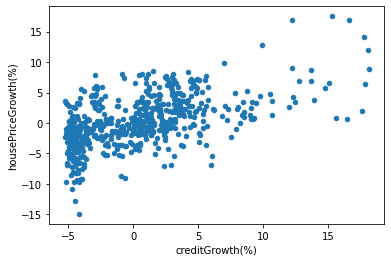

In [23]:
#fig, ax = plt.subplots()
ax = relation.plot.scatter(x='creditGrowth', y='housePriceGrowth', 
                           xlabel='creditGrowth(%)',ylabel='housePriceGrowth(%)')

